In [1]:
from fastai.vision.all import *
import os
from pathlib import Path

In [2]:
path =untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/home/manas/.fastai/data/mnist_sample/train'),Path('/home/manas/.fastai/data/mnist_sample/valid'),Path('/home/manas/.fastai/data/mnist_sample/labels.csv')]

In [3]:
(path/'train').ls()

(#2) [Path('/home/manas/.fastai/data/mnist_sample/train/7'),Path('/home/manas/.fastai/data/mnist_sample/train/3')]

now lets take some 3s and 7s from the training datasets

In [4]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
print(threes[:3])
print(sevens[:3])

[Path('/home/manas/.fastai/data/mnist_sample/train/3/10.png'), Path('/home/manas/.fastai/data/mnist_sample/train/3/10000.png'), Path('/home/manas/.fastai/data/mnist_sample/train/3/10011.png')]
[Path('/home/manas/.fastai/data/mnist_sample/train/7/10002.png'), Path('/home/manas/.fastai/data/mnist_sample/train/7/1001.png'), Path('/home/manas/.fastai/data/mnist_sample/train/7/10014.png')]


In [5]:
#now lets display the images
im3_path = threes[3]
im3 = Image.open(im3_path)
im3

In [6]:
img7_path = sevens[3]
img7 = Image.open(img7_path)
img7

In a computer, everything is represented as a number. To view the numbers that make
up this image, we have to convert it to a NumPy array or a PyTorch tensor. For
instance, here’s what a section of the image looks like converted to a NumPy array:

In [7]:
array(img7)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  19],
       [  0,   0,   0,   0,  13, 144]], dtype=uint8)

In [8]:
tensor(im3)[5:35,5:35]

tensor([[  0,   0,   0,   0,   0, 104, 253, 253, 253, 255, 253, 253, 253, 218,
          32,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 178, 248, 252, 252, 252, 253, 252, 252, 252, 252,
         215,  34,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 186, 252, 252, 252, 252, 253, 252, 252, 252, 252,
         252,  79,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 186, 252, 243, 172, 172,  39,  39,  39, 219, 252,
         252,  79,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  39,  53,  47,   0,   0,   0,  29, 117, 244, 252,
         252,  79,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 208, 252, 252, 252,
         184,  21,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   3,  41, 253, 252, 252, 252, 206,
          21,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   5,  41, 165, 252, 253, 252

In [9]:
import pandas as pd
im3_tensor = tensor(im3)
df  = pd.DataFrame(im3_tensor.numpy())
df.style.background_gradient(cmap='Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,104,253,253,253,255,253,253,253,218,32,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,178,248,252,252,252,253,252,252,252,252,215,34,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,186,252,252,252,252,253,252,252,252,252,252,79,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,186,252,243,172,172,39,39,39,219,252,252,79,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,39,53,47,0,0,0,29,117,244,252,252,79,0,0,0,0,0,0,0


for our simple model is to get the average of pixel values for each of our two
groups. In the process of doing this

In [10]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors),len(three_tensors)

(6265, 6131)

(<Axes: >, <Axes: >)

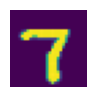

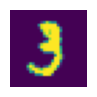

In [11]:
show_image(seven_tensors[0]),show_image(three_tensors[0])

For every pixel position, we want to compute the average over all the images of the
intensity of that pixel. To do this, we first combine all the images in this list into a
single three-dimensional tensor. The most common way to describe such a tensor is
to call it a rank-3 tensor.

Some operations in PyTorch, such as taking a mean, require us to cast our integer
types to float types. Since we’ll be needing this later, we’ll also cast our stacked tensor
to float now. Casting in PyTorch is as simple as writing the name of the type you
wish to cast to, and treating it as a method.

In [12]:
import torch
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens.shape,stacked_threes.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In [13]:
#to find the rank of the tensors
stacked_threes.ndim

3

Finally, we can compute what the ideal 3 looks like. We calculate the mean of all the
image tensors by taking the mean along dimension 0 of our stacked, rank-3 tensor.
This is the dimension that indexes over all the images.

(<Axes: title={'center': 'mean of all threes'}>,
 <Axes: title={'center': 'Mean of all sevens'}>)

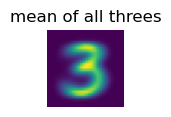

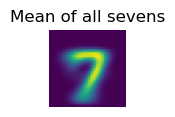

In [14]:
mean3= stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
#according to the model these should be the ideal didgits
show_image(mean3,title="mean of all threes"),show_image(mean7,title="Mean of all sevens")

<Axes: title={'center': 'This is what a sample three looks like'}>

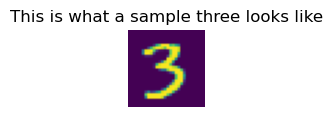

In [15]:
#here is a simple sample of three
a3 = stacked_threes[1]
show_image(a3,title="This is what a sample three looks like")

now what we need to do is measure the diatance of rach sample of mean three and mean sevens
Take the mean of the absolute value of differences (absolute value is the function
that replaces negative values with positive values). This is called the mean abso‐
lute difference or L1 norm.
• Take the mean of the square of differences (which makes everything positive) and
then take the square root (which undoes the squaring). This is called the root
mean squared error (RMSE) or L2 norm.

In [16]:
#lets try both of these methods now
dist_3_abs = (a3-mean3).abs().mean()
dist_3_sqr = (a3-mean3).pow(2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [17]:
#lets try the diffence between the 2
dist_7_abs = (a3 - mean7).abs().mean()
dist_7_sqr = ((a3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [18]:
#these things are already there in pytorch .This is called l1 losses for abs means and MSE for the squared errors.The diffrence bwtween them is just that MSE penalizes errors more often than L1
F.l1_loss(a3,mean3),F.mse_loss(a3,mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

Lets take a bit of look at tensors in pytorch

In [19]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)
arr,tns

(array([[1, 2, 3],
        [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [20]:
tns[:1],tns[:,1],tns[:1,:]

(tensor([[1, 2, 3]]), tensor([2, 5]), tensor([[1, 2, 3]]))

In [21]:
tns[1,1:3],tns+1,tns.dtype

(tensor([5, 6]),
 tensor([[2, 3, 4],
         [5, 6, 7]]),
 torch.int64)

In [22]:
valid_3_tens = torch.stack([tensor(Image.open(o))
    for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
    for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [23]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a3, mean3)

tensor(0.1114)

In [24]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1086, 0.1092, 0.1124,  ..., 0.1368, 0.1382, 0.1187]),
 torch.Size([1010]))

In [25]:
#now lets predict the number whther it is 3 or 7 based on the distance that we have calculated
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)
is_3(a3),is_3(valid_3_tens[0]),is_3(valid_7_tens[0])

(tensor(True), tensor(True), tensor(False))

In [26]:
#by boradcasting we can do the same with complete set of tensors
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [27]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s,(accuracy_7s+accuracy_3s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

Our pixel similarity approach does not really do this. We
do not have any kind of weight assignment, or any way of improving based on testing
the effectiveness of a weight assignment. In other words, we can’t really improve our
pixel similarity approach by modifying a set of parameters.
Instead of trying to find the similarity between an image and an “ideal image,” we
could instead look at each individual pixel and come up with a set of weights for each,
such that the highest weights are associated with those pixels most likely to be black
for a particular category.

For instance, pixels toward the bottom right are not very
likely to be activated for a 7, so they should have a low weight for a 7, but they are
likely to be activated for an 8, so they should have a high weight for an 8.



Here we are assuming that X is the image, represented as a vector—in other words,
with all of the rows stacked up end to end into a single long line. And we are assum
ing that the weights are a vector W.

In [28]:
def pr_8(X,W): return (X*W).sum()


We want to find the specific values for the vector W that cause the result of our func‐
tion to be high for those images that are 8s, and low for those images that are not.
Searching for the best vector W is a way to search for the best function for recognizing
8s.

To be more specific, here are the steps required to turn this function into a machine
learning classifier:
1. Initialize the weights.
2. For each image, use these weights to predict whether it appears to be a 3 or a 7.
3. Based on these predictions, calculate how good the model is (its loss).
4. Calculate the gradient, which measures for each weight how changing that weight
would change the loss.
5. Step (that is, change) all the weights based on that calculation.
6. Go back to step 2 and repeat the process.
7. Iterate until you decide to stop the training process (for instance, because the
model is good enough or you don’t want to wait any longer).
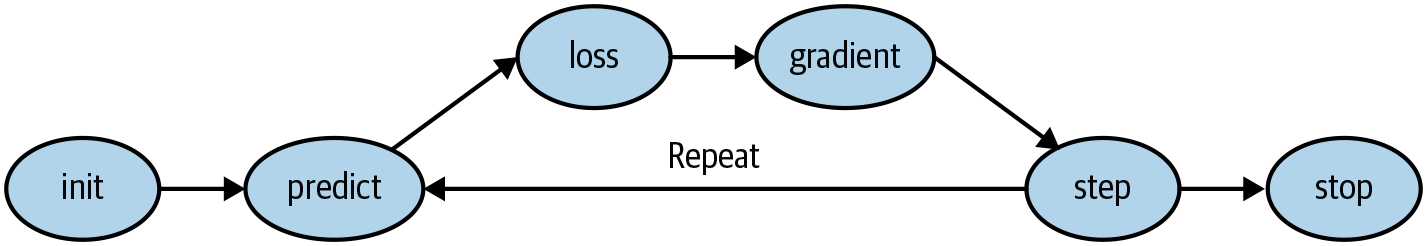

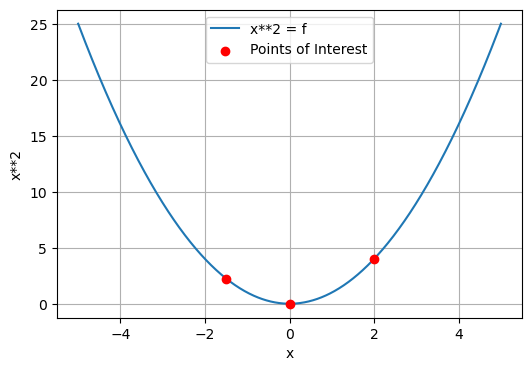

In [29]:
def f(x): 
    return x**2

import numpy as np
import matplotlib.pyplot as plt

def plot_function(func, x_label='x', y_label='y', 
                  x_range=(-10, 10), num_points=1000, 
                  points=None):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = func(x)

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=f"{y_label} = {func.__name__ if hasattr(func, '__name__') else 'f(x)'}")

    if points:
        if all(isinstance(p, (int, float)) for p in points):
            points = [(px, func(px)) for px in points]
        px, py = zip(*points)
        plt.scatter(px, py, color='red', label='Points of Interest', zorder=5)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_function(f, 'x', 'x**2', x_range=(-5, 5), points=[-1.5, 0, 2])


Nearly all approaches start with the basic
idea of multiplying the gradient by some small number, called the learning rate (LR).
The learning rate is often a number between 0.001 and 0.1, although it could be any‐
thing. Often people select a learning rate just by trying a few, and finding which
results in the best model after training (we’ll show you a better approach later in this
book, called the learning rate finder).

w -= w.grad * lr

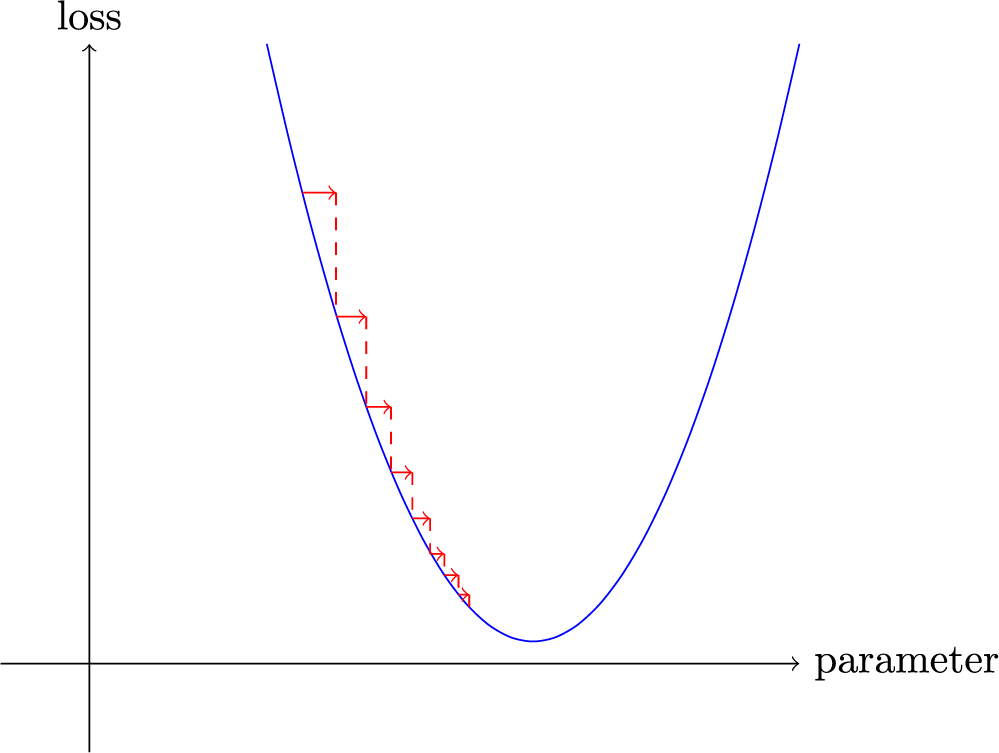

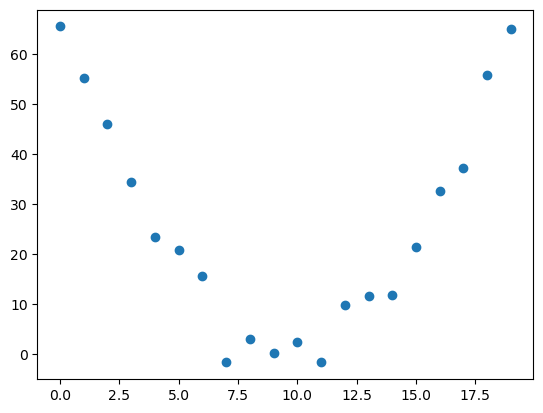

In [30]:
#ok now lets just try to implement a simpleSGD with an example
time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

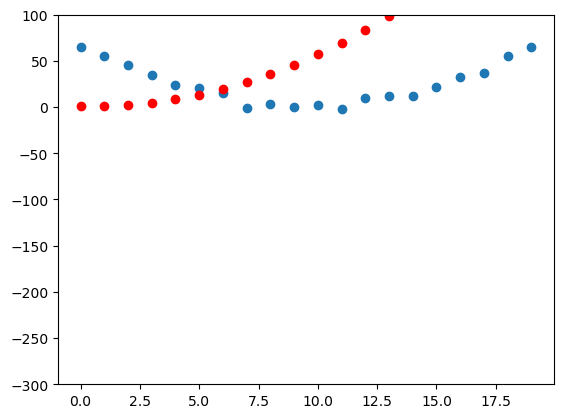

In [31]:
def f(t, params):
    a, b, c = params
    return a * t ** 2 + (b * t) + c

def mse(preds, targets):
    return ((preds - targets) ** 2).mean()

# now let's initialize the variables with some random values
params = torch.randn(3, requires_grad=True)
preds = f(time, params)

def show_preds(preds):
    fig, ax = plt.subplots()
    ax.scatter(time, speed)
    ax.scatter(time, preds.detach().numpy(), color='red')
    ax.set_ylim(-300, 100)

show_preds(preds)

In [32]:
#now lets calculate the loss
loss = mse(preds,speed)
#now our goal is to minimize this
loss

tensor(6584.6733, grad_fn=<MeanBackward0>)

In [33]:
params.grad

In [34]:
#now we can imporve these gradients as well
lr = 1e-5
if params.grad is not None:
    params.data -= params.grad * lr
params.grad = None

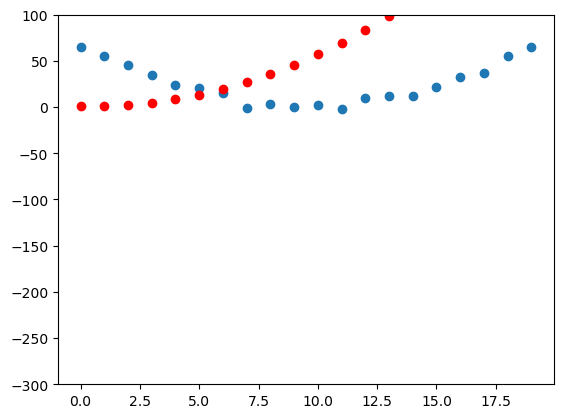

In [35]:
preds = f(time,params)
mse(preds, speed)
show_preds(preds)

In [36]:
#So all we have to do is repeat this process untill we get it right.
def apply_steps(params,prn = True):
    preds = f(time, params)
    loss = mse(preds, speed)
    if prn: print(loss.item())
    loss.backward()
    params.data -= params.grad * lr
    params.grad = None
    return preds

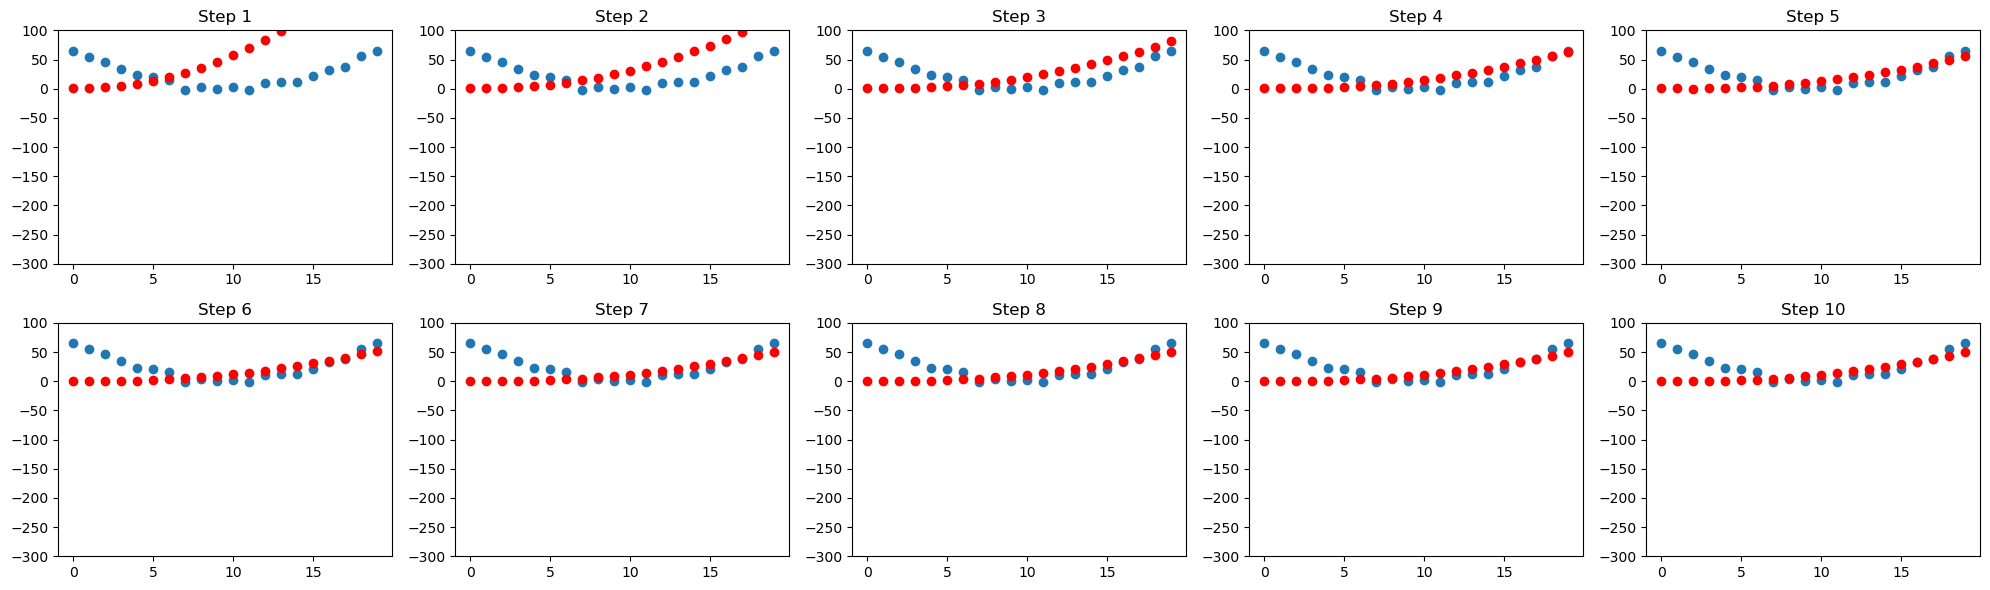

In [37]:
# now we just have to repeat the steps some times and show them in a grid
num_steps = 10
cols = 5
rows = (num_steps + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axs = axs.flatten()
for i in range(num_steps):
    preds = apply_steps(params, prn=False)
    ax = axs[i]
    ax.scatter(time, speed)
    ax.scatter(time, preds.detach().numpy(), color='red')
    ax.set_ylim(-300, 100)
    ax.set_title(f'Step {i+1}')
for j in range(num_steps, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

We already have our xs—that is, our independent variables, the images themselves.
We’ll concatenate them all into a single tensor, and also change them from a list of
matrices (a rank-3 tensor) to a list of vectors (a rank-2 tensor). We can do this using
view, which is a PyTorch method that changes the shape of a tensor without changing
its contents.

In [38]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes)+[0]*len(sevens))
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396]))

In [39]:
dset  = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y,len(dset)

(torch.Size([784]), tensor(1), 12396)

In [40]:
#initializing parmas with some random weigths
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
bias = init_params(1)



In neural networks, the w in the equation y=w*x+b is called the weights, and the b is
called the bias. Together, the weights and bias make up the parameters.

In [41]:
(train_x[0]*weights.T).sum() + bias


tensor([16.7600], grad_fn=<AddBackward0>)

In [42]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[16.7600],
        [13.1931],
        [ 7.2390],
        ...,
        [14.7573],
        [ 8.2220],
        [10.8478]], grad_fn=<AddBackward0>)

Let’s check our accuracy. To decide if an output represents a 3 or a 7, we can just
check whether it’s greater than 0, so our accuracy for each item can be calculated
(using broadcasting, so no loops!) as follows:

In [43]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False]])

In [44]:
corrects.float().mean().item()

0.49494126439094543

In [45]:
with torch.no_grad():
    weights[0] *= 1.0001

preds = linear1(train_x)
acc = ((preds > 0.0).float() == train_y).float().mean().item()
print(acc)


0.49494126439094543


now we need to measure our loss function


In [46]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [47]:
#now lets add sigmoid to the function
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [48]:
mnist_loss(preds,train_y)

tensor(0.5050, grad_fn=<MeanBackward0>)

Now that we have a loss function suitable for driving SGD, we can consider some of
the details involved in the next phase of the learning process, which is to change or
update the weights based on the gradients. This is called an optimization step.

To take an optimization step, we need to calculate the loss over one or more data
items. How many should we use? We could calculate it for the whole dataset and take
the average, or we could calculate it for a single data item. But neither of these is ideal.
Calculating it for the whole dataset would take a long time. Calculating it for a single
item would not use much information, so it would result in an imprecise and unsta‐
ble gradient. You’d be going to the trouble of updating the weights, but taking into
account only how that would improve the model’s performance on that single item.
So instead we compromise: we calculate the average loss for a few data items at a
time. This is called a mini-batch.

A DataLoader can take any Python collection and turn it into an iterator over many
batches, like so:

In [49]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)


In [50]:
#Let’s create a mini-batch of size 4 for testing:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [51]:
preds = linear1(batch)
loss = mnist_loss(preds, train_y[:4])
loss,preds

(tensor(0.0038, grad_fn=<MeanBackward0>),
 tensor([[16.7600],
         [13.1931],
         [ 7.2390],
         [ 4.2086]], grad_fn=<AddBackward0>))

In [52]:
def calc_grad(xb,yb,model):
    preds = model(xb)
    loss = mnist_loss(preds,yb)
    loss.backward()
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0007), tensor([-0.0038]))

In [53]:
def train_epoch(model,lr,params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data-=p.grad*lr
            p.grad.zero_()

In [54]:
def batch_accuracy(xb,yb):
    preds = xb.sigmoid()
    correct = (preds>0.5)==yb
    return correct.float().mean()
(preds>0.0).float() == train_y[:4],batch_accuracy(linear1(batch), train_y[:4])


(tensor([[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]),
 tensor(1.))

In [55]:
import torch
from torch.utils.data import DataLoader

# Fake data
train_x = torch.randn(15, 3)
train_y = torch.randint(0, 2, (15, 1)).float()

dataset = list(zip(train_x, train_y))
dl = DataLoader(dataset, batch_size=5, shuffle=True)

# Parameters
weights = torch.randn(3, 1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

def linear1(xb):
    return xb @ weights + bias

loss_fn = torch.nn.BCEWithLogitsLoss()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    loss.backward()

def batch_accuracy(preds, yb):
    preds = preds.sigmoid()
    return ((preds > 0.5) == yb).float().mean()

# def train_epoch(model, lr, params):
#     for xb, yb in dl:
#         calc_grad(xb, yb, model)
#         for p in params:
#             p.data -= p.grad * lr
#             p.grad.zero_()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in dl]
    return round(torch.stack(accs).mean().item(), 4)



In [56]:
# Training
lr = 0.1
params = [weights, bias]

def train_epoch(model, lr, params):
    for xb, yb in dl:
        # calculate loss & grads
        calc_grad(xb, yb, model)

        # manual gradient descent update
        with torch.no_grad():
            for p in params:
                p -= p.grad * lr
                p.grad.zero_()

for epoch in range(20):
    train_epoch(linear1, lr, params)
    print(f"Epoch {epoch+1}: {validate_epoch(linear1)}")


Epoch 1: 0.5333
Epoch 2: 0.5333
Epoch 3: 0.5333
Epoch 4: 0.6
Epoch 5: 0.6
Epoch 6: 0.6
Epoch 7: 0.6
Epoch 8: 0.6
Epoch 9: 0.6
Epoch 10: 0.6
Epoch 11: 0.6
Epoch 12: 0.6
Epoch 13: 0.6
Epoch 14: 0.6
Epoch 15: 0.6
Epoch 16: 0.6
Epoch 17: 0.6
Epoch 18: 0.7333
Epoch 19: 0.7333
Epoch 20: 0.6667


nn.Linear does the same thing as our init_params and linear together. It contains
both the weights and biases in a single class. Here’s how we replicate our model from
the previous section:

In [57]:
import torch.nn as nn

linear_model = nn.Linear(28*28, 1)

# Option 1: unpack explicitly
w, b = list(linear_model.parameters())
print(w.shape, b.shape)   # torch.Size([1, 784]) torch.Size([1])

# Option 2: access directly
print(linear_model.weight.shape)  # [1, 784]
print(linear_model.bias.shape)    # [1]


torch.Size([1, 784]) torch.Size([1])
torch.Size([1, 784])
torch.Size([1])


Now lets create an optimizer

In [58]:
class BasicOptim:
    def __init__(self, params, lr=0.01):
        # Convert params generator into a list so we can iterate multiple times
        self.params = list(params)
        self.lr = lr

    def step(self, *args, **kwargs):
        # Gradient descent update
        for p in self.params:
            if p.grad is not None:   # avoid NoneType errors
                p.data -= self.lr * p.grad

    def zero_grad(self):
        # Reset gradients (same as optimizer.zero_grad())
        for p in self.params:
            p.grad = None

# Example use
linear_model = nn.Linear(28*28, 1)  # fresh model
opt = BasicOptim(linear_model.parameters(), lr=0.01)

print(opt.params[0].shape)  # weight
print(opt.params[1].shape)  # bias


torch.Size([1, 784])
torch.Size([1])


In [59]:
# Raw parameters
weights = torch.randn(3, 1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

def linear1(xb):
    return xb @ weights + bias

def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        with torch.no_grad():
            for p in params:
                p -= lr * p.grad
                p.grad.zero_()

def train_model(model, epochs, lr, params):
    for i in range(epochs):
        train_epoch(model, lr, params)
        print(f"Epoch {i+1}: {validate_epoch(model)}")

# Run training
params = [weights, bias]
train_model(linear1, 20, 0.1, params)


Epoch 1: 0.5333
Epoch 2: 0.5333
Epoch 3: 0.5333
Epoch 4: 0.5333
Epoch 5: 0.5333
Epoch 6: 0.5333
Epoch 7: 0.4667
Epoch 8: 0.4667
Epoch 9: 0.4667
Epoch 10: 0.6
Epoch 11: 0.6
Epoch 12: 0.6
Epoch 13: 0.6667
Epoch 14: 0.6667
Epoch 15: 0.6667
Epoch 16: 0.6667
Epoch 17: 0.6667
Epoch 18: 0.6667
Epoch 19: 0.6
Epoch 20: 0.5333


In [60]:
validate_epoch(linear1)

0.5333

In [61]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader

# Fake dataset (28*28 flattened images → binary labels)
train_x = torch.randn(100, 28*28)   # 100 samples, each 784 features
train_y = torch.randint(0, 2, (100, 1)).float()
dataset = list(zip(train_x, train_y))
dl = DataLoader(dataset, batch_size=32, shuffle=True)

# Define model (same as linear1 but using nn.Linear)
linear_model = nn.Linear(28*28, 1)

# Loss
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
opt = SGD(linear_model.parameters(), lr=0.01)

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    loss.backward()

def batch_accuracy(preds, yb):
    preds = preds.sigmoid()
    return ((preds > 0.5) == yb).float().mean()

def train_epoch(model, opt):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in dl]
    return round(torch.stack(accs).mean().item(), 4)

def train_model(model, epochs, opt):
    for i in range(epochs):
        train_epoch(model, opt)
        print(f"Epoch {i+1}: {validate_epoch(model)}")

train_model(linear_model, 20, opt)


Epoch 1: 0.6719
Epoch 2: 0.7422
Epoch 3: 0.7578
Epoch 4: 0.7891
Epoch 5: 0.8203
Epoch 6: 0.7891
Epoch 7: 0.8672
Epoch 8: 0.9453
Epoch 9: 0.9609
Epoch 10: 0.9297
Epoch 11: 0.9922
Epoch 12: 1.0
Epoch 13: 1.0
Epoch 14: 1.0
Epoch 15: 1.0
Epoch 16: 1.0
Epoch 17: 1.0
Epoch 18: 1.0
Epoch 19: 1.0
Epoch 20: 1.0


fastai also provides Learner.fit, which we can use instead of train_model. To create
a Learner, we first need to create a DataLoaders, by passing in our training and vali‐
dation DataLoaders:

In [62]:
from fastai.optimizer import SGD  
from fastai.learner import Learner
from fastai.data.core import DataLoaders

dls = DataLoaders(dl, dl)  
learn = Learner(
    dls,
    nn.Linear(28*28, 1),
    opt_func=SGD,  
    loss_func=mnist_loss,
    metrics=batch_accuracy
)



In [63]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.468780,0.354023,0.800000,00:00
1,0.418117,0.257483,0.930000,00:00
2,0.355281,0.191108,0.970000,00:00
3,0.309776,0.145192,0.970000,00:00
4,0.267828,0.114382,0.990000,00:00
5,0.236056,0.091050,0.990000,00:00
6,0.210117,0.074982,1.000000,00:00
7,0.187926,0.062774,1.000000,00:00
8,0.168271,0.054518,1.000000,00:00
9,0.152864,0.047223,1.000000,00:00


A linear classifier
is constrained in terms of what it can do. To make it a bit more complex (and able to
handle more tasks), we need to add something nonlinear (i.e., different from ax+b)
between two linear classifiers—this is what gives us a neural network.
Here is the entire definition of a basic neural network:

In [64]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [65]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2+b2
    return res


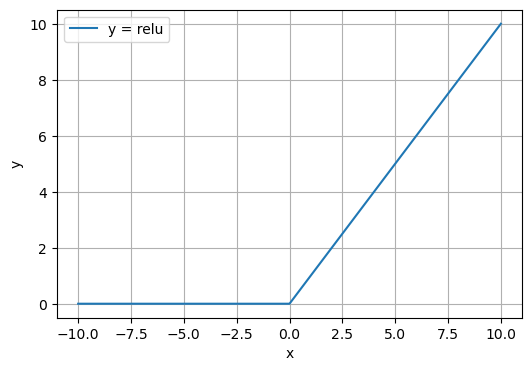

In [66]:
import torch
import torch.nn.functional as F
def plot_function(func, x_label='x', y_label='y', 
                  x_range=(-10, 10), num_points=1000, 
                  points=None):
    x = torch.linspace(x_range[0], x_range[1], num_points)
    y = func(x)

    plt.figure(figsize=(6, 4))
    plt.plot(x.numpy(), y.numpy(), label=f"{y_label} = {func.__name__ if hasattr(func, '__name__') else 'f(x)'}")

    if points:
        if all(isinstance(p, (int, float)) for p in points):
            points = [(px, func(px)) for px in points]
        px, py = zip(*points)
        plt.scatter(px, py, color='red', label='Points of Interest', zorder=5)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()
plot_function(F.relu)

In [67]:
#this is the code in pytorch
simple_net = nn.Sequential(
nn.Linear(28*28,30),
nn.ReLU(),
nn.Linear(30,1)
)

In [68]:
learn = Learner(dls,simple_net,opt_func=SGD,loss_func=mnist_loss,metrics=batch_accuracy)
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.500692,0.469623,0.590000,00:00
1,0.489112,0.441983,0.680000,00:00
2,0.476072,0.413911,0.770000,00:00
3,0.460041,0.382883,0.820000,00:00
4,0.444048,0.348890,0.900000,00:00
5,0.423184,0.310791,0.940000,00:00
6,0.403722,0.269591,0.980000,00:00
7,0.377679,0.231654,0.980000,00:00
8,0.354742,0.196211,0.980000,00:00
9,0.333589,0.164244,1.000000,00:00


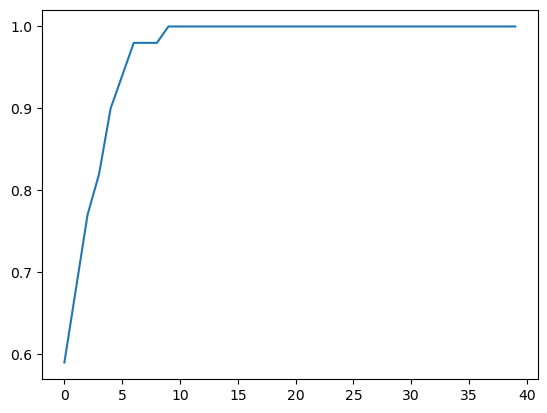

In [69]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [70]:
print(learn.recorder.values[:4])
print(f"final accuracy {learn.recorder.values[-1][2]}")


[[0.5006921291351318, 0.4696231484413147, 0.5899999737739563], [0.48911216855049133, 0.4419829845428467, 0.6800000071525574], [0.47607171535491943, 0.4139108955860138, 0.7699999809265137], [0.46004149317741394, 0.3828834295272827, 0.8199999928474426]]
final accuracy 1.0


In [71]:
#this is what happens when we train i ton ore complex model as we increaee rhe accuracy just keeps on increasing

dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/lib/python3.13/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.137579,0.022487,0.995584,01:35
